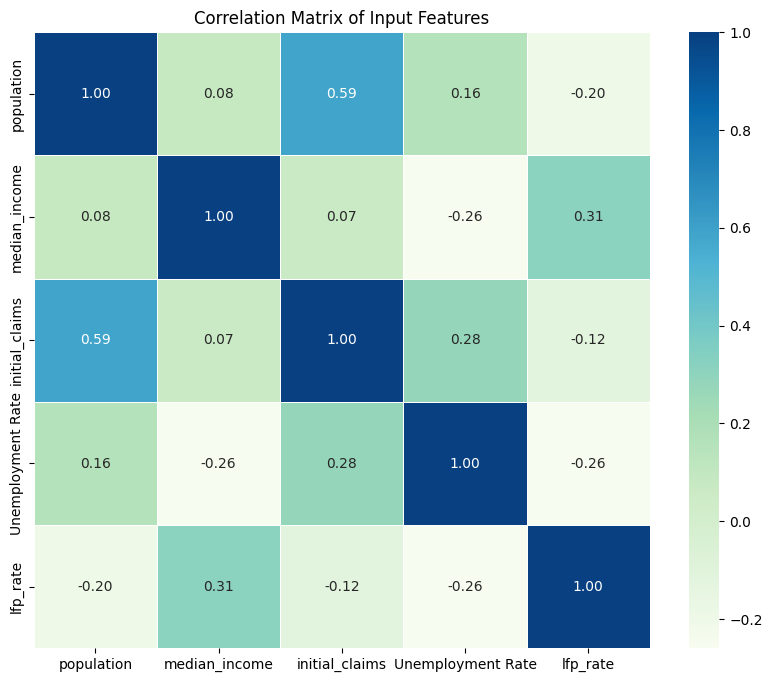

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Tony_data/merged_data.csv", parse_dates=["month"])

# Drop non-numeric or irrelevant columns (like 'state', 'month')
df_numeric = df.drop(columns=['state', 'month'], errors='ignore')

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='GnBu', square=True, linewidths=.5)

# Add a title
plt.title("Correlation Matrix of Input Features")

# Show the plot
plt.show()

In [8]:
series_df = df['Unemployment Rate'].to_frame()
series_df = series_df.set_index(df.index)
series_df['trend'] = series_df['Unemployment Rate'].rolling(365).mean()
series_df["detrended"] = series_df["Unemployment Rate"] - series_df["trend"]
series_df["seasonality"] = series_df.groupby(by=df["month"])["detrended"].transform('mean')
series_df["deseasonality"] =  series_df['Unemployment Rate'] - series_df['seasonality']

series_df["resid"] = series_df["detrended"] - series_df["seasonality"]
series_df.dropna(inplace=True)
series_df

,Unemployment Rate,trend,detrended,seasonality,deseasonality,resid
364,4.6,6.386849,-1.786849,-1.464502,6.064502,-0.322348
365,4.5,6.373973,-1.873973,-1.489052,5.989052,-0.384921
366,4.3,6.361096,-2.061096,-1.492055,5.792055,-0.569041
367,4.2,6.348493,-2.148493,-1.495305,5.695305,-0.653188
368,4.1,6.336438,-2.236438,-1.510556,5.610556,-0.725882
...,...,...,...,...,...,...
23249,5.3,7.098082,-1.798082,-1.416315,6.716315,-0.381767
23250,5.3,7.090411,-1.790411,-1.379688,6.679688,-0.410723
23251,5.3,7.083288,-1.783288,-1.355138,6.655138,-0.428149
23252,5.3,7.076164,-1.776164,-1.356250,6.656250,-0.419914


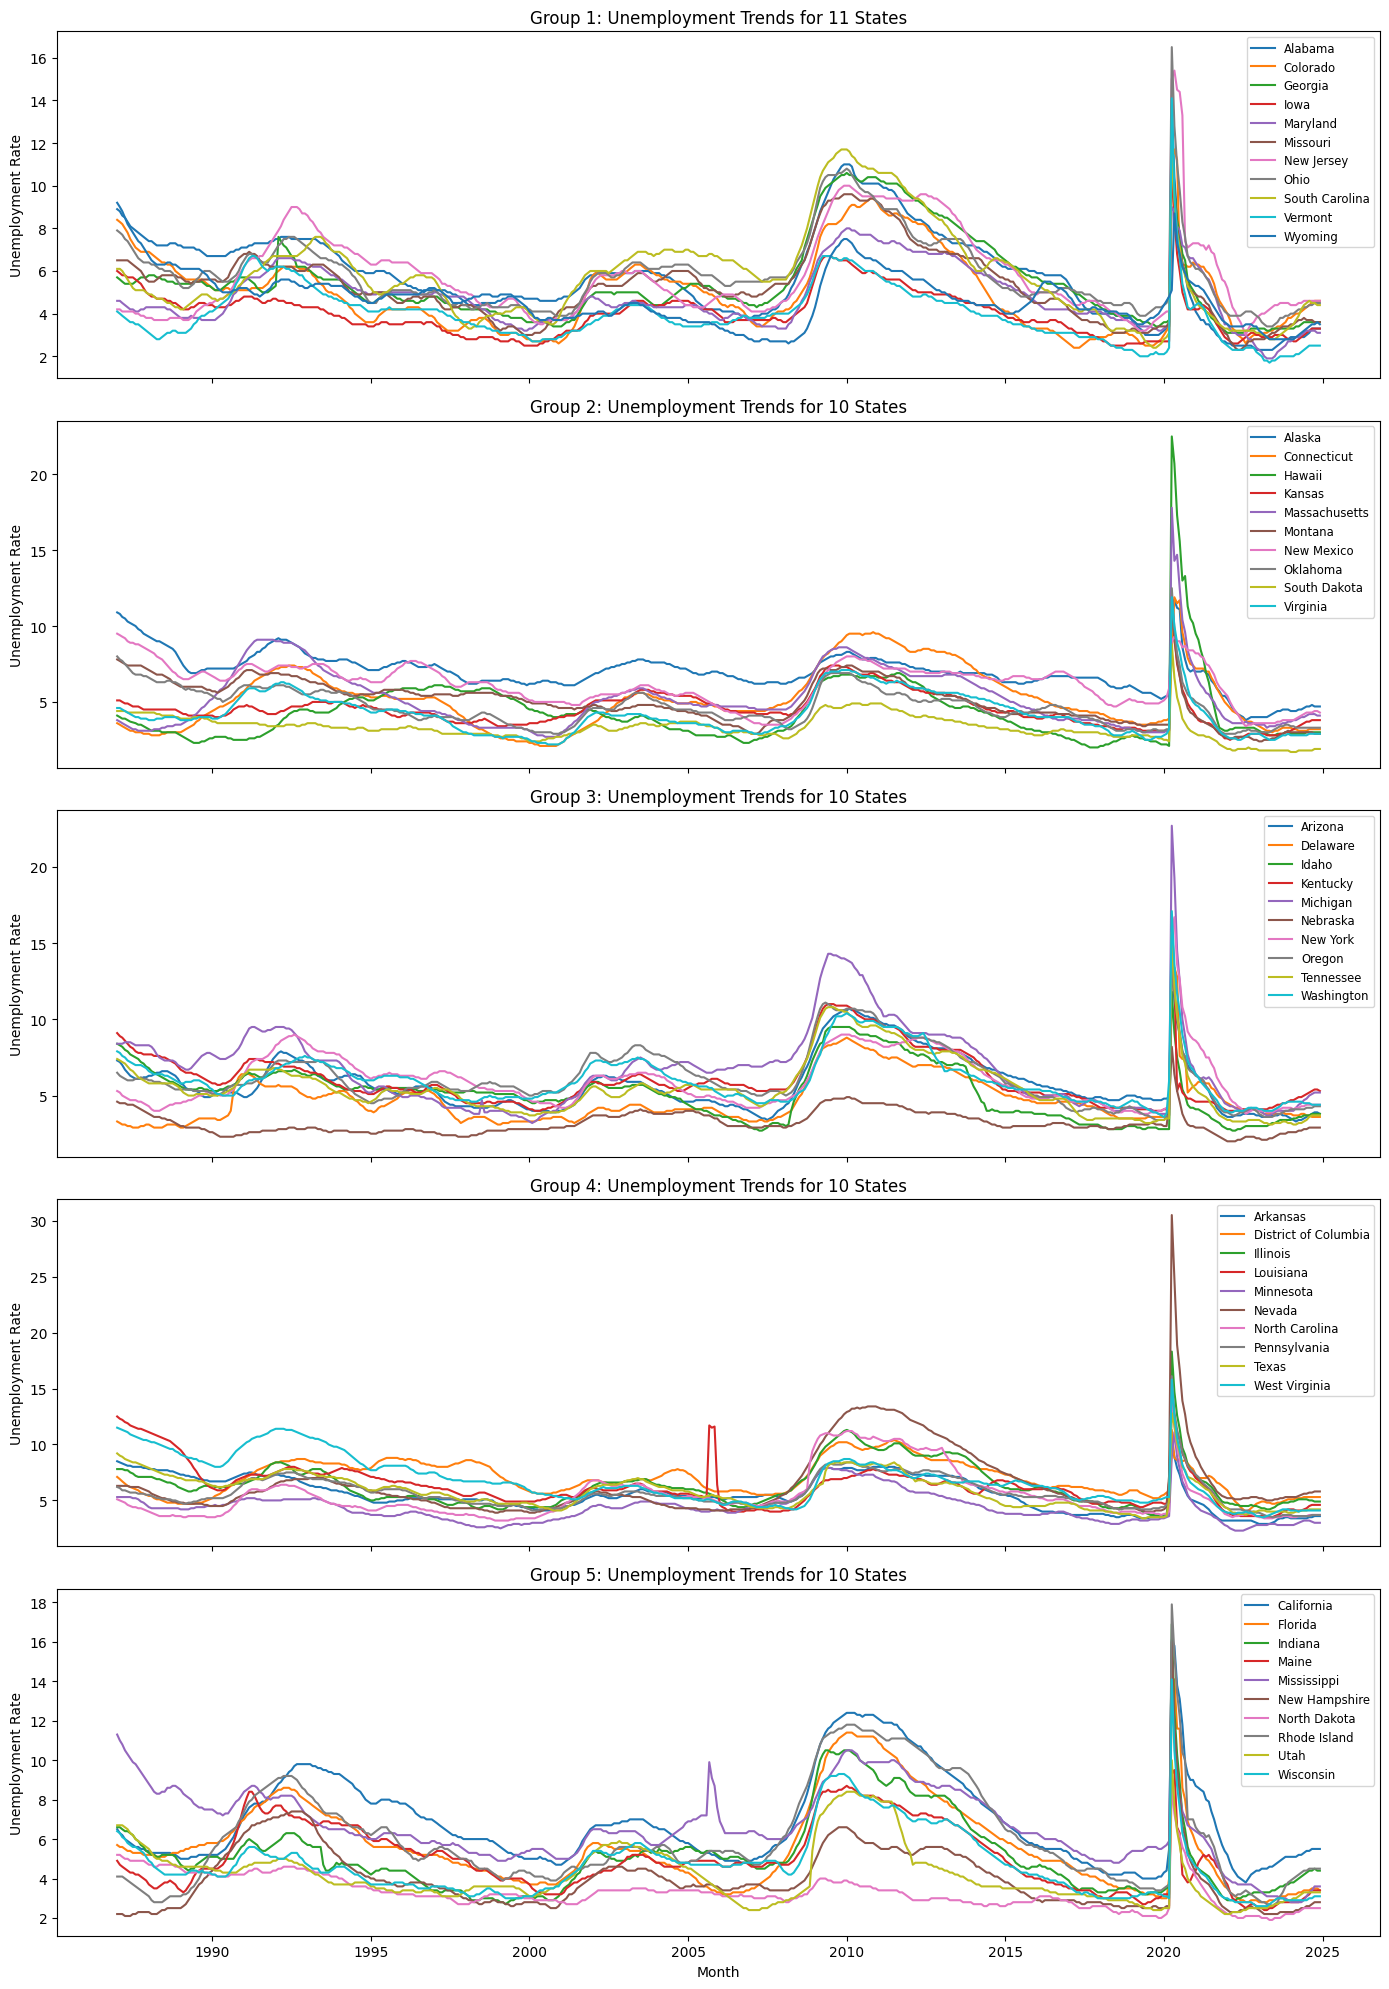

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Tony_data/merged_data.csv")

# Ensure 'month' is datetime
df['month'] = pd.to_datetime(df['month'])

# Drop rows with missing unemployment_rate
df = df.dropna(subset=['Unemployment Rate'])

# Get sorted list of states
states = sorted(df['state'].unique())

# Split states into 5 roughly equal groups
state_groups = [states[i::5] for i in range(5)]

# Create 5 subplots
fig, axs = plt.subplots(5, 1, figsize=(14, 20), sharex=True)

for i, group in enumerate(state_groups):
    ax = axs[i]
    for state in group:
        state_data = df[df['state'] == state]
        ax.plot(state_data['month'], state_data['Unemployment Rate'], label=state)
    
    ax.set_title(f"Group {i+1}: Unemployment Trends for {len(group)} States")
    ax.set_ylabel("Unemployment Rate")
    ax.legend(loc='upper right', fontsize='small')

# Final plot formatting
axs[-1].set_xlabel("Month")
plt.tight_layout()
plt.show()


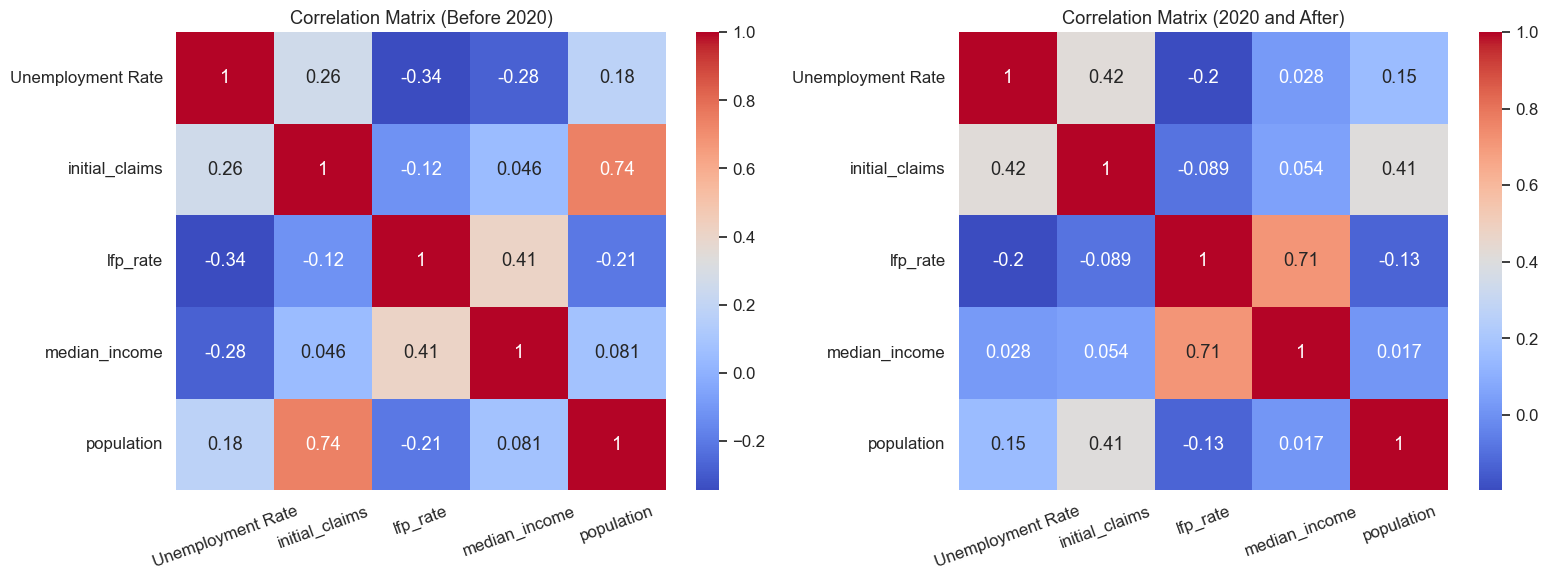

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("Tony_data/merged_data.csv")
df['month'] = pd.to_datetime(df['month'])

# Filter numeric columns only
numeric_cols = ['Unemployment Rate', 'initial_claims', 'lfp_rate', 'median_income', 'population']
df_numeric = df[numeric_cols + ['month']].dropna()

# Split the data
df_before_2020 = df_numeric[df_numeric['month'] < '2020-01-01'].drop(columns=['month'])
df_after_2020 = df_numeric[df_numeric['month'] >= '2020-01-01'].drop(columns=['month'])

# Set plot style
sns.set(style="white", font_scale=1.1)

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before 2020
sns.heatmap(df_before_2020.corr(), annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Correlation Matrix (Before 2020)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=20)

# 2020 and After
sns.heatmap(df_after_2020.corr(), annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlation Matrix (2020 and After)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=20)

plt.tight_layout()
plt.show()

